In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
data_path = "./RNA_DE"
cell_type1 = "MLI1"
cell_type2 = "PLI"

In [4]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Ryr2,10.683028,-3.739553,0.244283,-15.308287,6.731370e-53,8.495662e-49
1,Grid2,178.250975,2.726475,0.193760,14.071374,5.695212e-45,3.593964e-41
2,Kcnb2,3.192196,-4.439279,0.322677,-13.757638,4.582557e-43,1.927882e-39
3,Ptprd,19.688709,-4.254664,0.320452,-13.277079,3.144200e-40,9.920738e-37
4,Frmpd4,19.894972,3.435946,0.266396,12.897865,4.627389e-38,1.168045e-34
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


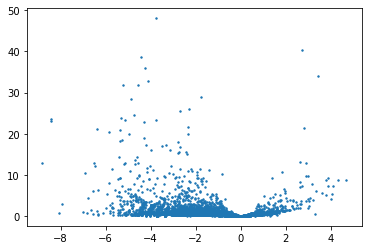

In [5]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 1)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,Grid2,178.250975,2.726475,0.193760,14.071374,5.695212e-45,3.593964e-41
4,Frmpd4,19.894972,3.435946,0.266396,12.897865,4.627389e-38,1.168045e-34
20,Rora,115.495047,2.821635,0.273501,10.316728,5.920640e-25,3.558305e-22
43,Slc24a3,13.896157,2.640895,0.321672,8.209896,2.213803e-16,6.350093e-14
45,Kirrel3,50.087042,2.887250,0.354416,8.146490,3.746387e-16,1.027895e-13
...,...,...,...,...,...,...,...
526,Pla2g4e,1.724359,1.880247,0.515996,3.643916,2.685210e-04,6.406480e-03
541,Ptprz1,21.377092,1.120403,0.310044,3.613692,3.018676e-04,7.006312e-03
581,Kcna2,2.785593,1.627827,0.457941,3.554662,3.784652e-04,8.207233e-03
590,St8sia5,2.951944,1.517881,0.428106,3.545570,3.917655e-04,8.372183e-03


In [7]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -1)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Ryr2,10.683028,-3.739553,0.244283,-15.308287,6.731370e-53,8.495662e-49
2,Kcnb2,3.192196,-4.439279,0.322677,-13.757638,4.582557e-43,1.927882e-39
3,Ptprd,19.688709,-4.254664,0.320452,-13.277079,3.144200e-40,9.920738e-37
5,Opcml,21.864181,-4.112249,0.323987,-12.692651,6.494943e-37,1.366211e-33
6,Rgs6,23.630872,-5.214915,0.417328,-12.495966,7.853620e-36,1.416008e-32
...,...,...,...,...,...,...,...
630,Csrp1,1.925222,-3.564582,1.022952,-3.484603,4.928685e-04,9.858151e-03
631,Dzank1,1.603697,-1.433990,0.411628,-3.483707,4.945198e-04,9.875528e-03
632,Lrp4,1.286980,-3.983347,1.144383,-3.480780,4.999552e-04,9.968301e-03
633,Rbpms,4.790513,-3.614227,1.038598,-3.479911,5.015808e-04,9.984938e-03


# proceed with threshold 2 first

In [9]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Klhl1"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
27,Klhl1,1.640312,-5.271552,0.547868,-9.621937,6.460321e-22,2.911990e-19
4239,Lypd6,0.860270,3.304613,2.073628,1.593639,1.110170e-01,3.304588e-01


In [10]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 1)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -1)] = cell_type2

In [11]:
df["category"] = category
df.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Ryr2,10.683028,-3.739553,0.244283,-15.308287,6.731370e-53,8.495662e-49,PLI
1,Grid2,178.250975,2.726475,0.193760,14.071374,5.695212e-45,3.593964e-41,MLI1
2,Kcnb2,3.192196,-4.439279,0.322677,-13.757638,4.582557e-43,1.927882e-39,PLI
3,Ptprd,19.688709,-4.254664,0.320452,-13.277079,3.144200e-40,9.920738e-37,PLI
4,Frmpd4,19.894972,3.435946,0.266396,12.897865,4.627389e-38,1.168045e-34,MLI1


In [12]:
df[df["gene"].isin(["Lypd6","Gabra6"])]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
4239,Lypd6,0.860270,3.304613,2.073628,1.593639,0.111017,0.330459,0.0
6152,Gabra6,1.995268,-1.539451,1.304398,-1.180200,0.237921,0.487847,0.0


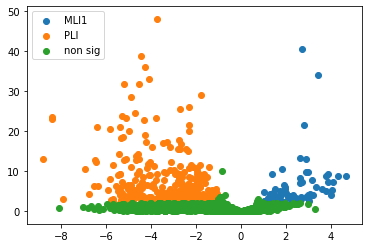

In [13]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [14]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Ryr2,10.683028,-3.739553,0.244283,-15.308287,6.731370e-53,8.495662e-49,PLI
1,Grid2,178.250975,2.726475,0.193760,14.071374,5.695212e-45,3.593964e-41,MLI1
2,Kcnb2,3.192196,-4.439279,0.322677,-13.757638,4.582557e-43,1.927882e-39,PLI
3,Ptprd,19.688709,-4.254664,0.320452,-13.277079,3.144200e-40,9.920738e-37,PLI
4,Frmpd4,19.894972,3.435946,0.266396,12.897865,4.627389e-38,1.168045e-34,MLI1
...,...,...,...,...,...,...,...,...
630,Csrp1,1.925222,-3.564582,1.022952,-3.484603,4.928685e-04,9.858151e-03,PLI
631,Dzank1,1.603697,-1.433990,0.411628,-3.483707,4.945198e-04,9.875528e-03,PLI
632,Lrp4,1.286980,-3.983347,1.144383,-3.480780,4.999552e-04,9.968301e-03,PLI
633,Rbpms,4.790513,-3.614227,1.038598,-3.479911,5.015808e-04,9.984938e-03,PLI


# Map back to genome

In [15]:
meta_root = "/groups/CaiLab/personal/yujing/yodai_brain/jupyter_script/100k_files"
meta1 = pd.read_csv(os.path.join(data_path, "mm10_25kb_bins_genes_new.csv"), header = None).iloc[:, [0, 1, 2, 3, 5]]
meta1.columns = ["name", "chrom", "Start", "End", "gene"]
meta2 = pd.read_csv(os.path.join(data_path, "mm10_25kb_bins_genes.csv"), header = None).iloc[:, [0, 1, 2, 3, 6]]
meta2.columns = ["name", "chrom", "Start", "End", "gene"]
meta3 = pd.read_csv(os.path.join(data_path,
                                 "LC1-100k-000-008-annotation-of-100k-loci-with-all-genes-single-match.csv"))
meta3["gene"] = meta3["gene"].str.replace("-", ".")
meta3["gene"] = meta3["gene"].str.replace("March", "Marchf")
meta3["gene"] = meta3["gene"].str.replace("Sept", "Septin")

# Mismatch between DE gene naming and annotated namming

In [16]:
DE_sig_25kb = meta1.merge(DE_genes)

In [17]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 16 gene, 0.026272577996715927 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
36,A930011G23Rik,4.431177,-2.439845,0.274977,-8.872921,7.125208e-19,2.430466e-16,PLI
58,X4930578G10Rik,7.256472,-2.689843,0.351597,-7.650350,2.004331e-14,4.287569e-12,PLI
71,Mir124.2hg,1.782073,-4.516990,0.625287,-7.223863,5.053106e-13,8.857673e-11,PLI
141,X9530059O14Rik,4.006524,-6.343598,1.094545,-5.795646,6.805858e-09,6.049066e-07,PLI
161,X4930445B16Rik,1.487889,-2.466344,0.448193,-5.502861,3.736779e-08,2.911227e-06,PLI
185,X5330434G04Rik,7.136364,-1.110131,0.213969,-5.188281,2.122444e-07,1.440181e-05,PLI
316,Lrrc16a,4.849156,-1.641162,0.377095,-4.352115,1.348304e-05,5.368123e-04,PLI
366,mt.Nd5,0.874189,-3.291526,0.796151,-4.134299,3.560390e-05,1.224406e-03,PLI
378,X3110062M04Rik,0.432507,-4.357080,1.065435,-4.089484,4.323335e-05,1.441816e-03,PLI
382,Gm1043,0.620382,-3.436666,0.843925,-4.072242,4.656269e-05,1.526410e-03,PLI


In [18]:
# first round of search
added_miss_gene2 = miss_df.merge(meta2)
added_miss_gene2

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,name,chrom,Start,End
0,Gm1043,0.620382,-3.436666,0.843925,-4.072242,0.000047,0.001526,PLI,chr5-1348,chr5,37075000,37100000
1,Gm1043,0.620382,-3.436666,0.843925,-4.072242,0.000047,0.001526,PLI,chr5-1349,chr5,37100000,37125000
2,Gm1043,0.620382,-3.436666,0.843925,-4.072242,0.000047,0.001526,PLI,chr5-1350,chr5,37125000,37150000
3,Gm1043,0.620382,-3.436666,0.843925,-4.072242,0.000047,0.001526,PLI,chr5-1351,chr5,37150000,37175000
4,Gm1043,0.620382,-3.436666,0.843925,-4.072242,0.000047,0.001526,PLI,chr5-1352,chr5,37175000,37200000
5,Gm1043,0.620382,-3.436666,0.843925,-4.072242,0.000047,0.001526,PLI,chr5-1354,chr5,37225000,37250000
6,Phxr4,0.538143,-3.639579,1.015693,-3.583346,0.000339,0.007551,PLI,chr9-415,chr9,13425000,13450000


In [19]:
# check missing gene
# missing genes
miss_genes2 = [x for x in miss_genes  if x not in added_miss_gene2["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes2), len(miss_genes2) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df2 = df[df["gene"].isin(miss_genes2)]
miss_df2

missing 14 gene, 0.022988505747126436 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
36,A930011G23Rik,4.431177,-2.439845,0.274977,-8.872921,7.125208e-19,2.430466e-16,PLI
58,X4930578G10Rik,7.256472,-2.689843,0.351597,-7.650350,2.004331e-14,4.287569e-12,PLI
71,Mir124.2hg,1.782073,-4.516990,0.625287,-7.223863,5.053106e-13,8.857673e-11,PLI
141,X9530059O14Rik,4.006524,-6.343598,1.094545,-5.795646,6.805858e-09,6.049066e-07,PLI
161,X4930445B16Rik,1.487889,-2.466344,0.448193,-5.502861,3.736779e-08,2.911227e-06,PLI
185,X5330434G04Rik,7.136364,-1.110131,0.213969,-5.188281,2.122444e-07,1.440181e-05,PLI
316,Lrrc16a,4.849156,-1.641162,0.377095,-4.352115,1.348304e-05,5.368123e-04,PLI
366,mt.Nd5,0.874189,-3.291526,0.796151,-4.134299,3.560390e-05,1.224406e-03,PLI
378,X3110062M04Rik,0.432507,-4.357080,1.065435,-4.089484,4.323335e-05,1.441816e-03,PLI
402,X4921534H16Rik,0.499945,-3.920162,0.979384,-4.002680,6.262886e-05,1.956532e-03,PLI


In [20]:
# Second round of search
added_miss_gene3 = miss_df2.merge(meta3)
added_miss_gene3

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,gene_ID,chrom,strand,gene_start,gene_end,name
0,A930011G23Rik,4.431177,-2.439845,0.274977,-8.872921,7.125208e-19,2.430466e-16,PLI,NR_030692,chr5,-,99297243,99729060,chr5-3853
1,Mir124.2hg,1.782073,-4.516990,0.625287,-7.223863,5.053106e-13,8.857673e-11,PLI,NR_033490,chr3,+,17789920,17800071,chr3-587


In [21]:
# check missing gene
# missing genes
miss_genes3 = [x for x in miss_genes2  if x not in added_miss_gene3["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes3), len(miss_genes3) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df3 = df[df["gene"].isin(miss_genes3)]

missing 12 gene, 0.019704433497536946 of detected DE genes


# OK! tried our best to get all genes

In [22]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["Start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)
added_miss_gene2["200kb bin"] = added_miss_gene2["Start"] // 200000
added_miss_gene2["200kb name"] = added_miss_gene2["chrom"] + "-g" + added_miss_gene2["200kb bin"].astype(str)

In [23]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [24]:
DE_sig_200kb = pd.concat([DE_sig_25kb[cols], added_miss_gene2[cols]]).sort_values(by = ["chrom", "200kb bin"])

In [25]:
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')
DE_sig_200kb_no_dup

,200kb name,chrom,200kb bin,gene,baseMean,log2FoldChange,pvalue,padj,category
0,chr1-g57,chr1,57,A830018L16Rik,0.744584,-3.041529,5.165736e-07,3.089894e-05,PLI
8,chr1-g58,chr1,58,A830018L16Rik,0.744584,-3.041529,5.165736e-07,3.089894e-05,PLI
16,chr1-g59,chr1,59,A830018L16Rik,0.744584,-3.041529,5.165736e-07,3.089894e-05,PLI
24,chr1-g76,chr1,76,Kcnb2,3.192196,-4.439279,4.582557e-43,1.927882e-39,PLI
29,chr1-g77,chr1,77,Kcnb2,3.192196,-4.439279,4.582557e-43,1.927882e-39,PLI
...,...,...,...,...,...,...,...,...,...
6775,chrX-g838,chrX,838,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1
6783,chrX-g839,chrX,839,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1
6791,chrX-g840,chrX,840,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1
6799,chrX-g841,chrX,841,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1


In [27]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_83494/3433087015.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")


,ID,VIIa_F002.8,VIIa_M002.9,VIIa_M006.9,VIIb_F002.8,VIIb_M002.7,VIIb_M006.8,VIIc_M002.8,VIId_M002.9,VIIa_F002.12,VIIa_M002.13,VIIa_M006.13,VIIb_F002.12,VIIb_M002.11,VIIb_M006.12,VIIc_M002.12,VIId_M002.13
0,CLUSTER,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,PLI,PLI,PLI,PLI,PLI,PLI,PLI,PLI
1,Xkr4,53.5948272840804,43.279884611744,61.2805288139014,41.5969990510138,49.2577139285487,53.8271418006571,59.7718668656137,62.6031475874452,96.0563214272697,12.6171644169799,22.5246447193548,23.2288599561392,37.5609939971219,72.1221437608317,16.9224477890325,42.0068115835197
2,Gm1992,5.62675352063836,8.41553311895023,7.47830182135745,5.25761326295341,5.61163829565745,4.61375501148489,10.3829064508343,12.0060830989621,0,6.30858220848993,1.0238474872434,4.64577199122784,0,4.24247904475481,10.5765298681453,5.72820157957087
3,Gm37381,0.140668838015959,0.300554754248222,0.207730606148818,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Rp1,0,0,0.207730606148818,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [29]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,MLI1_1,MLI1_2,MLI1_3,MLI1_4,MLI1_5,MLI1_6,MLI1_7,MLI1_8,PLI_1,PLI_2,PLI_3,PLI_4,PLI_5,PLI_6,PLI_7,PLI_8,MLI1_mean,PLI_mean
0,Xkr4,53.594827,43.279885,61.280529,41.596999,49.257714,53.827142,59.771867,62.603148,96.056321,12.617164,22.524645,23.228860,37.560994,72.122144,16.922448,42.006812,53.151514,40.379923
1,Gm1992,5.626754,8.415533,7.478302,5.257613,5.611638,4.613755,10.382906,12.006083,0.000000,6.308582,1.023847,4.645772,0.000000,4.242479,10.576530,5.728202,7.424073,4.065677
2,Gm37381,0.140669,0.300555,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081119,0.000000
3,Rp1,0.000000,0.000000,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025966,0.000000
4,Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, 
                                        "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [31]:
DE_sig_200kb_no_dup

,200kb name,chrom,200kb bin,gene,baseMean,log2FoldChange,pvalue,padj,category,MLI1_mean,PLI_mean
0,chr1-g57,chr1,57,A830018L16Rik,0.744584,-3.041529,5.165736e-07,3.089894e-05,PLI,0.642871,4.878230
1,chr1-g58,chr1,58,A830018L16Rik,0.744584,-3.041529,5.165736e-07,3.089894e-05,PLI,0.642871,4.878230
2,chr1-g59,chr1,59,A830018L16Rik,0.744584,-3.041529,5.165736e-07,3.089894e-05,PLI,0.642871,4.878230
3,chr1-g76,chr1,76,Kcnb2,3.192196,-4.439279,4.582557e-43,1.927882e-39,PLI,0.955372,19.273960
4,chr1-g77,chr1,77,Kcnb2,3.192196,-4.439279,4.582557e-43,1.927882e-39,PLI,0.955372,19.273960
...,...,...,...,...,...,...,...,...,...,...,...
1361,chrX-g838,chrX,838,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1,138.093827,15.019664
1362,chrX-g839,chrX,839,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1,138.093827,15.019664
1363,chrX-g840,chrX,840,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1,138.093827,15.019664
1364,chrX-g841,chrX,841,Frmpd4,19.894972,3.435946,4.627389e-38,1.168045e-34,MLI1,138.093827,15.019664


In [32]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [33]:
final_200kb

,200kb name,category,MLI1_mean,PLI_mean,gene
0,chr1-g106,PLI,4.785520,47.702838,Kcnq5
1,chr1-g107,PLI,4.785520,47.702838,Kcnq5
2,chr1-g108,PLI,4.785520,47.702838,Kcnq5
3,chr1-g109,PLI,4.785520,47.702838,Kcnq5
4,chr1-g121,PLI,0.061699,0.631069,Col19a1
...,...,...,...,...,...
1316,chrX-g838,MLI1,138.093827,15.019664,Frmpd4
1317,chrX-g839,MLI1,138.093827,15.019664,Frmpd4
1318,chrX-g840,MLI1,138.093827,15.019664,Frmpd4
1319,chrX-g841,MLI1,138.093827,15.019664,Frmpd4


In [34]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,MLI1_mean,PLI_mean,gene,chrom
0,chr1-g106,PLI,4.785520,47.702838,Kcnq5,chr1
1,chr1-g107,PLI,4.785520,47.702838,Kcnq5,chr1
2,chr1-g108,PLI,4.785520,47.702838,Kcnq5,chr1
3,chr1-g109,PLI,4.785520,47.702838,Kcnq5,chr1
4,chr1-g121,PLI,0.061699,0.631069,Col19a1,chr1
...,...,...,...,...,...,...
1316,chrX-g838,MLI1,138.093827,15.019664,Frmpd4,chrX
1317,chrX-g839,MLI1,138.093827,15.019664,Frmpd4,chrX
1318,chrX-g840,MLI1,138.093827,15.019664,Frmpd4,chrX
1319,chrX-g841,MLI1,138.093827,15.019664,Frmpd4,chrX


In [35]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,MLI1_mean,PLI_mean,gene,chrom,chrom_id,group,log2FC_M2P
32,chr1-g57,PLI,0.642871,4.878230,A830018L16Rik,chr1,1,57,-2.923757
35,chr1-g58,PLI,0.642871,4.878230,A830018L16Rik,chr1,1,58,-2.923757
39,chr1-g59,PLI,0.642871,4.878230,A830018L16Rik,chr1,1,59,-2.923757
55,chr1-g76,PLI,0.955372,19.273960,Kcnb2,chr1,1,76,-4.334447
56,chr1-g77,PLI,0.955372,19.273960,Kcnb2,chr1,1,77,-4.334447
...,...,...,...,...,...,...,...,...,...
1316,chrX-g838,MLI1,138.093827,15.019664,Frmpd4,chrX,20,838,3.200724
1317,chrX-g839,MLI1,138.093827,15.019664,Frmpd4,chrX,20,839,3.200724
1318,chrX-g840,MLI1,138.093827,15.019664,Frmpd4,chrX,20,840,3.200724
1319,chrX-g841,MLI1,138.093827,15.019664,Frmpd4,chrX,20,841,3.200724


In [39]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)